In [1]:
# Import our dependencies
import pandas as pd
import tensorflow as tf
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Restaurant Menu 
**Step 1:** Obtain the **cheapest, most expensive and average price per plate** per restaurant *in preparation for merging to restaurant dataframe*.

In [2]:
#  Import and read the Kaggle restaurant menu dataset csv.
menu_df = pd.read_csv("Resources/restaurant-menus.csv")
menu_df.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [3]:
#  Split the price column between price and currency
menu_df[['unit_price','currency']] = menu_df['price'].str.split(' ', 1, expand=True)
menu_df.head()

,restaurant_id,category,name,description,price,unit_price,currency
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,15.99,USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,15.99,USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,14.99,USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,15.99,USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,14.99,USD


In [4]:
#  Check the data types to see if conversion to float is needed
menu_df.dtypes

restaurant_id     int64
category         object
name             object
description      object
price            object
unit_price       object
currency         object
dtype: object

In [5]:
#  Convert unit price data type from object to float
menu_df['unit_price'] = menu_df['unit_price'].astype('float')
menu_df.dtypes

restaurant_id      int64
category          object
name              object
description       object
price             object
unit_price       float64
currency          object
dtype: object

In [6]:
# Summarize by restaurant and obtain the cheapest, most expensive and average price per plate
restaurant_group = menu_df.groupby(['restaurant_id'])
cheapest = restaurant_group['unit_price'].min()
most_expensive = restaurant_group['unit_price'].max()
average = restaurant_group['unit_price'].mean()

plate_df = pd.DataFrame({"cheapest_plate": cheapest,
                         "most_expensive_plate" : most_expensive,
                         "average_plate": average})
plate_df.head()

,cheapest_plate,most_expensive_plate,average_plate
restaurant_id,,,
1,1.89,16.99,5.663684
2,0.60,8.49,5.505333
3,3.00,16.78,10.762143
4,2.49,16.99,10.531892
5,1.00,20.00,4.532576


In [7]:
# Create another id column using the index value to align with restaurant df in preparation for merging
plate_df['id'] = plate_df.index
plate_df.head()

,cheapest_plate,most_expensive_plate,average_plate,id
restaurant_id,,,,
1,1.89,16.99,5.663684,1
2,0.60,8.49,5.505333,2
3,3.00,16.78,10.762143,3
4,2.49,16.99,10.531892,4
5,1.00,20.00,4.532576,5


# Restaurant

In [8]:
#  Import and read the Kaggle restaurant dataset csv.
restaurants = pd.read_csv("Resources/restaurants.csv")
restaurants.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


**Step 2:** Left merge **cheapest, most expensive and average price per plate** with the restaurant dataframe *before dropping any null values*.

In [9]:
# Merge the restaurant dataset with the plate data
restaurants_df = pd.merge(restaurants, plate_df, on = 'id', how = 'left')
restaurants_df.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,cheapest_plate,most_expensive_plate,average_plate
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1.89,16.99,5.663684
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330,0.60,8.49,5.505333
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640,3.00,16.78,10.762143
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614,2.49,16.99,10.531892
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,1.00,20.00,4.532576


**Step 3:** Check records **null values** and *drop them*.

In [10]:
# Determine the number of unique values in each column
restaurants_df.nunique()

id                      40227
position                  300
name                    38863
score                      33
ratings                   416
category                10647
price_range                 4
full_address            35302
zip_code                 2281
lat                     36780
lng                     36745
cheapest_plate            668
most_expensive_plate     2993
average_plate           36594
dtype: int64

In [11]:
#  Check rows with null values
for column in restaurants_df.columns:
    print(f'Column {column} has {restaurants_df[column].isnull().sum()} null values')

Column id has 0 null values
Column position has 0 null values
Column name has 0 null values
Column score has 17973 null values
Column ratings has 17973 null values
Column category has 23 null values
Column price_range has 6646 null values
Column full_address has 278 null values
Column zip_code has 287 null values
Column lat has 0 null values
Column lng has 0 null values
Column cheapest_plate has 86 null values
Column most_expensive_plate has 86 null values
Column average_plate has 86 null values


In [12]:
#  Drop records with null values
df = restaurants_df.dropna(how='any')
df

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,cheapest_plate,most_expensive_plate,average_plate
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,5.00,60.00,13.445946
13,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247,0.00,45.79,9.504055
15,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950,2.35,14.00,13.024194
18,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,0.00,9.49,4.796667
19,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"American, Burgers, Sandwich",$$,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260,2.49,16.99,9.023333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40222,40223,54,Mangia la pasta! (5610 N Interstate Hwy 35),4.8,500.0,"Pasta, Comfort Food, Italian, Group Friendly",$,"5610 N I35, Austin, TX, 78751",78751,30.316248,-97.708441,1.50,19.99,9.786721
40223,40224,53,Wholly Cow Burgers (S Lamar),4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",$,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.242816,-97.783821,1.00,13.99,5.228919
40224,40225,52,EurAsia Ramen 3,4.7,293.0,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",$,"5222 Burnet Road, Austin, TX, 78756",78756,30.324290,-97.740200,0.00,21.60,7.648000
40225,40226,51,Austin's Habibi (5th St),4.7,208.0,"Mediterranean, Gluten Free Friendly, Allergy F...",$$,"817 W 5th St, Austin, TX, 78703",78703,30.269580,-97.753110,1.50,40.00,9.583509


**Result:** Valid records after removing the null **values** is **19060**.

In [13]:
# Determine the number of unique values in each column
df.nunique()

id                      19060
position                  300
name                    18745
score                      30
ratings                   409
category                 5574
price_range                 4
full_address            17778
zip_code                 1373
lat                     18538
lng                     18529
cheapest_plate            480
most_expensive_plate     2168
average_plate           17992
dtype: int64

#### Kaggle Data Definition 

* id (Restaurant id)
* position (Restaurant position in the search result)
* name (Restaurant name)
* score (Restaurant score)
* ratings (Ratings count)
* category (Restaurant category)
* price_range (Restaurant price range (1 = Inexpensive, 2 = Moderately expensive, 3 = Expensive, 4 = Very Expensive)
* full_address (Restaurant full address)
* zip_code (Zip code)
* lat (Latitude)
* long (Longitude)

**Step 4:** Identify the **features** and **target**, *in preparation for deep learning modeling*.

#### Target and Features
* position (Restaurant position in the search result) - **target (1, 0)** 
* score (Restaurant score)
* ratings (Ratings count)
* category (Restaurant category) - **split and identify the top category**
* price_range (Restaurant price range (1 = Inexpensive, 2 = Moderately expensive, 3 = Expensive, 4 = Very Expensive)
* cheapest plate - **new column**
* most expensive plate - **new column**
* average plate - **new column**

In [14]:
# Determine the number of unique values in each column.
df["position"].value_counts()

1      530
2      486
3      478
4      430
5      398
      ... 
276      5
299      4
291      3
287      2
298      1
Name: position, Length: 300, dtype: int64

(array([0.0262154 , 0.02128466, 0.01793316, 0.01444128, 0.01205487,
        0.01163374, 0.0103879 , 0.00884375, 0.00772073, 0.00758036,
        0.00689602, 0.00701885, 0.00628187, 0.00600112, 0.0058081 ,
        0.00524659, 0.00536942, 0.00445697, 0.00445697, 0.00464999,
        0.00422886, 0.00440433, 0.0042464 , 0.00415867, 0.00408848,
        0.0036849 , 0.0036498 , 0.00322867, 0.00350942, 0.0033515 ,
        0.00328131, 0.00289528, 0.0033515 , 0.00287773, 0.00254433,
        0.00257943, 0.00270226, 0.00252679, 0.00257943, 0.0024566 ,
        0.00224603, 0.00270226, 0.00254433, 0.00207056, 0.00252679,
        0.00201792, 0.00208811, 0.00203547, 0.00178981, 0.00200037,
        0.0015266 , 0.0018249 , 0.00214075, 0.00222848, 0.00170207,
        0.00177226, 0.0018249 , 0.00186   , 0.00135113, 0.00170207,
        0.00168452, 0.00184245, 0.00131603, 0.00161434, 0.00133358,
        0.0012283 , 0.00094754, 0.00136868, 0.00103528, 0.00126339,
        0.00108792, 0.00108792, 0.00105283, 0.00

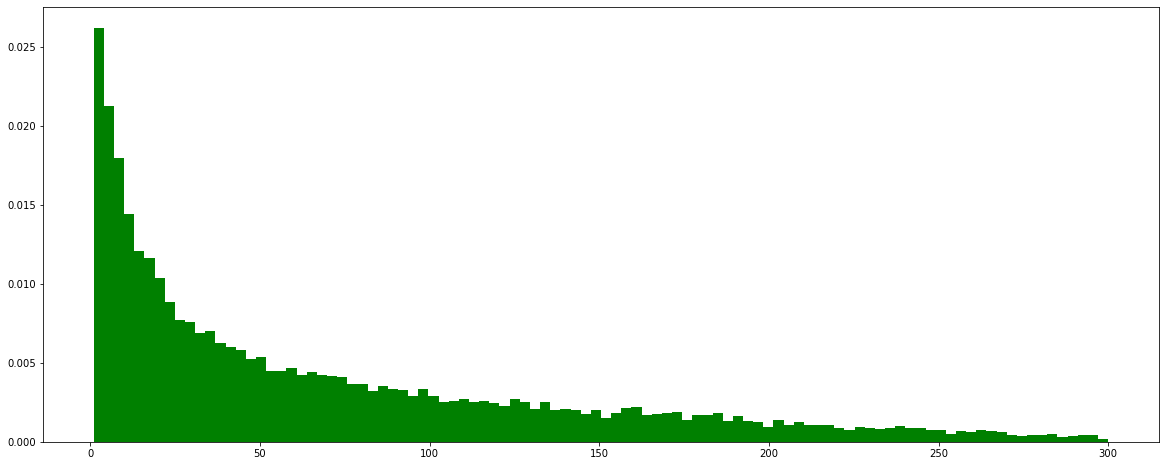

In [15]:
# See the distributio of the position data
plt.figure(figsize=(20,8))
plt.hist(df["position"], density=True, bins=100, color='green')

In [16]:
# Determine the number of unique values in each column.
df["score"].value_counts()

4.7    3396
4.8    3254
4.6    2851
4.5    2296
4.4    1635
4.9    1535
4.3    1141
4.2     870
4.1     538
5.0     468
4.0     316
3.9     249
3.8     165
3.7      97
3.6      68
3.5      49
3.2      31
3.4      31
3.3      16
3.1      11
2.9      10
3.0       9
2.7       9
2.8       6
2.1       3
2.6       2
2.4       1
2.5       1
2.2       1
1.3       1
Name: score, dtype: int64

In [17]:
# Determine the number of unique values in each column.
df["ratings"].value_counts()

200.0    865
100.0    422
11.0     384
10.0     383
12.0     378
        ... 
251.0      1
441.0      1
429.0      1
458.0      1
388.0      1
Name: ratings, Length: 409, dtype: int64

In [18]:
# Determine the number of unique values in each column.
df["category"].value_counts()

American, Burgers, Fast Food                  556
Burritos, Fast Food, Mexican                  344
Burgers, American, Sandwiches                 330
Fast Food, Sandwich, American                 315
Mexican, Latin American, New Mexican          289
                                             ... 
Asian Fusion, Noodles, Vietnamese, Chinese      1
Mexican, Tex Mex, Allergy Friendly              1
Fast Food, American, Family Meals               1
Salads, Healthy, Soup                           1
American, Bakery, Desserts                      1
Name: category, Length: 5574, dtype: int64

In [19]:
# Determine the number of unique values in each column.
df["price_range"].value_counts()

$       14527
$$       4423
$$$       101
$$$$        9
Name: price_range, dtype: int64

**Step 5**: Drop **non-beneficial columns** and *reset index* and **convert the ratings** into *numeric values*.

In [20]:
# Drop the non-beneficial ID columns
final_df = df.drop(columns=["id","name","full_address","lat","lng","zip_code"])
final_df = final_df.reset_index(drop=True)
final_df

,position,score,ratings,category,price_range,cheapest_plate,most_expensive_plate,average_plate
0,27,4.7,63.0,"Sushi, Asian, Japanese",$,5.00,60.00,13.445946
1,51,4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,0.00,45.79,9.504055
2,88,5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,2.35,14.00,13.024194
3,30,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,0.00,9.49,4.796667
4,40,3.7,19.0,"American, Burgers, Sandwich",$$,2.49,16.99,9.023333
...,...,...,...,...,...,...,...,...
19055,54,4.8,500.0,"Pasta, Comfort Food, Italian, Group Friendly",$,1.50,19.99,9.786721
19056,53,4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",$,1.00,13.99,5.228919
19057,52,4.7,293.0,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",$,0.00,21.60,7.648000
19058,51,4.7,208.0,"Mediterranean, Gluten Free Friendly, Allergy F...",$$,1.50,40.00,9.583509


In [21]:
# Convert the ratings into numeric values
def changeprice(price):
    if price=="$":
        return 1
    elif price=="$$":
        return 2
    elif price=="$$$":
        return 3
    elif price=="$$$$":
        return 4
final_df["price_range"]=final_df["price_range"].apply(changeprice)
final_df['price_range'] = final_df['price_range'].astype("str")
final_df

,position,score,ratings,category,price_range,cheapest_plate,most_expensive_plate,average_plate
0,27,4.7,63.0,"Sushi, Asian, Japanese",1,5.00,60.00,13.445946
1,51,4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",1,0.00,45.79,9.504055
2,88,5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",3,2.35,14.00,13.024194
3,30,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",1,0.00,9.49,4.796667
4,40,3.7,19.0,"American, Burgers, Sandwich",2,2.49,16.99,9.023333
...,...,...,...,...,...,...,...,...
19055,54,4.8,500.0,"Pasta, Comfort Food, Italian, Group Friendly",1,1.50,19.99,9.786721
19056,53,4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",1,1.00,13.99,5.228919
19057,52,4.7,293.0,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",1,0.00,21.60,7.648000
19058,51,4.7,208.0,"Mediterranean, Gluten Free Friendly, Allergy F...",2,1.50,40.00,9.583509


**Step 6**: Create and convert **target** to a binary column.

In [22]:
# Define the target, record with position 1 value
final_df['target'] = np.where(df['position']<= 10, 1, 0)
final_df = final_df.drop(columns=['position'])
final_df.head()

,score,ratings,category,price_range,cheapest_plate,most_expensive_plate,average_plate,target
0,4.7,63.0,"Sushi, Asian, Japanese",1,5.00,60.00,13.445946,0
1,4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",1,0.00,45.79,9.504055,0
2,5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",3,2.35,14.00,13.024194,0
3,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",1,0.00,9.49,4.796667,0
4,3.7,19.0,"American, Burgers, Sandwich",2,2.49,16.99,9.023333,0


In [23]:
# Determine the number of unique values in each column.
final_df["target"].value_counts()

0    15056
1     4004
Name: target, dtype: int64

**Step 7:** Apply **feature engineering**.  Split and identify the **top categories** to be added as feature with binary value 1 if category exist in series.

In [24]:
# Split the category column and store unique values in a list 'category_items'
category_items = []

for category in final_df['category']:
    items = category.lower().split(', ')

    for item in items:
        
        if item not in category_items:
            
            category_items.append(item) 

print (f'Unique item in category column: {len(category_items)}')            
print (category_items)

Unique item in category column: 290
['sushi', 'asian', 'japanese', 'breakfast and brunch', 'salad', 'sandwich', 'family meals', 'pizza', 'healthy', 'american', 'chicken', 'ice cream &amp; frozen yogurt', 'comfort food', 'desserts', 'middle eastern', 'mediterranean', 'vegetarian', 'greek', 'burgers', 'italian', 'exclusive to eats', 'bakery', 'cafe', 'coffee &amp; tea', 'mexican', 'fast food', 'salads', 'burritos', 'bowls', 'vegan', 'deli', 'french', 'indian', 'chinese', 'seafood', 'tacos', 'asian fusion', 'sandwiches', 'latin american', 'new mexican', 'wings', 'fried chicken', 'southern', 'steak', 'juice and smoothies', 'pasta', 'breakfast &amp; brunch', 'donuts', 'noodles', 'spanish', 'bar food', 'coffee and tea', 'dinner', 'black-owned', 'ice cream + frozen yogurt', 'bbq', 'burger', 'family friendly', 'group friendly', 'asian cuisine', 'thai', 'allergy friendly', 'kids friendly', 'cajun', 'chicken strips', 'soup', 'traditional american', 'dessert: other', 'hot dog', 'indian curry', 't

In [25]:
# Return a counter for each item on the unique category
counter = []

for i in range(len(category_items)):
    
    count = 0
    
    for row in final_df['category']:
        
        if category_items[i] in row.lower():
            
            count = count + 1

    counter.append(count)

print (f'Length of counter: {len(counter)}')  
print (counter)

Length of counter: 290
[519, 2131, 781, 2026, 2311, 4300, 3369, 1908, 2889, 9255, 1850, 116, 1850, 1777, 132, 392, 1308, 238, 3384, 1046, 400, 763, 639, 446, 2025, 3651, 1921, 526, 245, 257, 377, 28, 446, 919, 852, 197, 704, 1635, 693, 561, 1755, 511, 349, 550, 560, 679, 140, 180, 609, 23, 333, 509, 295, 185, 418, 522, 4071, 1878, 812, 2, 449, 361, 498, 47, 139, 185, 381, 2, 50, 65, 203, 65, 93, 104, 33, 56, 703, 94, 44, 135, 18, 120, 318, 15, 2, 47, 62, 11, 137, 642, 638, 96, 10, 1, 28, 133, 396, 50, 14, 90, 4, 23, 240, 551, 116, 28, 17, 17, 9, 1, 1, 19, 11, 21, 5, 2, 92, 21, 5, 30, 38, 3, 6, 253, 10, 15, 20, 1, 538, 8, 6, 20, 12, 16, 117, 591, 9, 2166, 2166, 2, 3, 9, 13, 5, 46, 15, 480, 61, 3, 14, 21, 72, 16, 29, 8, 93, 89, 17, 11, 7, 16, 8, 23, 29, 19, 2, 1, 2, 8, 4, 9, 5, 14, 7, 9, 22, 7, 1, 63, 4, 1, 16, 2, 2, 4, 15, 9, 1, 6, 4, 2, 5, 27, 8, 5, 9, 9, 1, 14, 4, 8, 4, 6, 4, 8, 15, 6, 10, 4, 3, 12, 4, 9, 12, 8, 23, 3, 2, 5, 1, 1, 2, 2, 1, 3, 2, 5, 2, 1, 5, 1, 1, 5, 1, 2, 5, 1, 3, 1, 

In [26]:
# Create a dictionary for category counter
category_dict = {'category' : category_items, 'count' : counter}
category_df = pd.DataFrame(category_dict)
category_df

,category,count
0,sushi,519
1,asian,2131
2,japanese,781
3,breakfast and brunch,2026
4,salad,2311
...,...,...
285,dosa,1
286,sopas e caldos,1
287,local eats,1
288,friedrice,1


In [27]:
# Determine the top category
sorted_df = category_df.sort_values('count', ascending = False)
sorted_df.head(50)

,category,count
9,american,9255
5,sandwich,4300
56,burger,4071
25,fast food,3651
18,burgers,3384
6,family meals,3369
8,healthy,2889
4,salad,2311
138,brunch,2166
137,breakfast,2166


#### Cuisine
* African
* American
* Arabian
* Asian
* Chinese
* European
* Indian
* Italian
* Japanese
* Korean
* Latin American
* Mediterranean
* Mexican
* Spanish
* Thai
* Others

**Step 8:** Create **top categories** as column and assign binary value 1 if category exist in the series.

In [28]:
# Show the dataframe
final_df.head()

,score,ratings,category,price_range,cheapest_plate,most_expensive_plate,average_plate,target
0,4.7,63.0,"Sushi, Asian, Japanese",1,5.00,60.00,13.445946,0
1,4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",1,0.00,45.79,9.504055,0
2,5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",3,2.35,14.00,13.024194,0
3,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",1,0.00,9.49,4.796667,0
4,3.7,19.0,"American, Burgers, Sandwich",2,2.49,16.99,9.023333,0


In [29]:
# Define the top cuisine and put them on a list for looping
cuisines = ['african', 'american', 'arabian', 'asian', 'chinese', 'european', 'indian', 'italian', 'japanese',
            'korean', 'latin_american', 'mediterranean', 'mexican', 'spanish', 'thai']

In [30]:
# Use lambda to create a column of top cuisine and return a value of 1 if cusine exists in category value
for category in cuisines:
    
    final_df[category] = final_df['category'].apply( lambda x: 1 if category.lower() in x.lower() else 0)

final_df.head()

,score,ratings,category,price_range,cheapest_plate,most_expensive_plate,average_plate,target,african,american,...,european,indian,italian,japanese,korean,latin_american,mediterranean,mexican,spanish,thai
0,4.7,63.0,"Sushi, Asian, Japanese",1,5.00,60.00,13.445946,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",1,0.00,45.79,9.504055,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",3,2.35,14.00,13.024194,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",1,0.00,9.49,4.796667,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.7,19.0,"American, Burgers, Sandwich",2,2.49,16.99,9.023333,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Use lambda to create an others column and return a value of 1 if cusine does not exist in category value
final_df['others'] = final_df['category'].apply( lambda x: 0 if any(i in x.lower() for i in cuisines) else 1)
final_df.head()

,score,ratings,category,price_range,cheapest_plate,most_expensive_plate,average_plate,target,african,american,...,indian,italian,japanese,korean,latin_american,mediterranean,mexican,spanish,thai,others
0,4.7,63.0,"Sushi, Asian, Japanese",1,5.00,60.00,13.445946,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",1,0.00,45.79,9.504055,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",3,2.35,14.00,13.024194,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",1,0.00,9.49,4.796667,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.7,19.0,"American, Burgers, Sandwich",2,2.49,16.99,9.023333,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Step 9:** Apply **transformation** to categorical data for uniform scaling

In [32]:
# Drop the category column
model = final_df.drop(columns=["category"])
model

,score,ratings,price_range,cheapest_plate,most_expensive_plate,average_plate,target,african,american,arabian,...,indian,italian,japanese,korean,latin_american,mediterranean,mexican,spanish,thai,others
0,4.7,63.0,1,5.00,60.00,13.445946,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,4.6,44.0,1,0.00,45.79,9.504055,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,20.0,3,2.35,14.00,13.024194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.9,48.0,1,0.00,9.49,4.796667,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.7,19.0,2,2.49,16.99,9.023333,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19055,4.8,500.0,1,1.50,19.99,9.786721,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19056,4.6,245.0,1,1.00,13.99,5.228919,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19057,4.7,293.0,1,0.00,21.60,7.648000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
19058,4.7,208.0,2,1.50,40.00,9.583509,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
# Convert categorical data to numeric with `pd.get_dummies`
model_df = pd.get_dummies(model, dtype=int)
model_df.head()

,score,ratings,cheapest_plate,most_expensive_plate,average_plate,target,african,american,arabian,asian,...,latin_american,mediterranean,mexican,spanish,thai,others,price_range_1,price_range_2,price_range_3,price_range_4
0,4.7,63.0,5.00,60.00,13.445946,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,4.6,44.0,0.00,45.79,9.504055,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5.0,20.0,2.35,14.00,13.024194,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,4.9,48.0,0.00,9.49,4.796667,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,3.7,19.0,2.49,16.99,9.023333,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Logistic Regression

In [35]:
# Assign data to X and y
X = model_df.drop('target', axis=1)
y = model_df['target']

In [36]:
# Print the shape
print("Shape: ", X.shape, y.shape)

Shape:  (19060, 25) (19060,)


In [37]:
# Split the data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [38]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [39]:
# Fit the data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [40]:
# Apply scaling on training data
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)

0.7886673662119622

In [41]:
# Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7907660020986359
Testing Data Score: 0.7888772298006296


In [42]:
# Show value count for y_test
y_test.value_counts()

0    3759
1    1006
Name: target, dtype: int64

In [43]:
# Show value count for y_train
y_train.value_counts()

0    11297
1     2998
Name: target, dtype: int64

# Confusion Matrix

In [44]:
#tn, fp, fn, tp
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred, labels=[1,0])

array([[   6, 1000],
       [   6, 3753]], dtype=int64)

In [45]:
# Print the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
tn, fp, fn, tp = cm.ravel()
print(f"True positives (TP): {tp} | True negatives (TN): {tn}")
print(f"False positives (FP): {fp}| False negatives (FN): {fn}")

True positives (TP): 3753 | True negatives (TN): 6
False positives (FP): 1000| False negatives (FN): 6


In [46]:
# Print the classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3759
           1       0.50      0.01      0.01      1006

    accuracy                           0.79      4765
   macro avg       0.64      0.50      0.45      4765
weighted avg       0.73      0.79      0.70      4765



#### Formulas:
- **precision** tp / (tp + fp), *how good the model is (does not account for positive missed)*, (3753 / (3753 + 1003)) = **79%**
<br>
- **recall (sensitivity)** tp / (tp + fn), (3753 / (3753 + 6)) = **99%**
<br>
- **f1-score** 2 * (precision + recall) / (precision + recall)

In [47]:
confusion_matrix(y, classifier.predict(X),labels = [1,0])

array([[   25,  3979],
       [   18, 15038]], dtype=int64)